#Assignment 2

In [56]:
import pandas as pd
import numpy as np
import sklearn.preprocessing as preprocessing 
import sklearn.tree
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.naive_bayes import CategoricalNB as NB
from sklearn.preprocessing import OrdinalEncoder

In [2]:
plt.rcParams["figure.figsize"] = (12,9)


#  Data pre-processing


In [3]:
df = pd.read_csv(r"/content/assignment2-1.csv")

In [ ]:
df.head()

,RID,age,income,student,credit_rating,class_buys_computer
0,1,youth,high,no,fair,no
1,2,youth,high,no,excellent,no
2,3,middle_aged,high,no,fair,yes
3,4,senior,medium,no,fair,yes
4,5,senior,low,yes,fair,yes


In [ ]:
df.shape

(14, 6)

In [4]:
df['class_buys_computer'].replace('no',0,inplace=True)
df['class_buys_computer'].replace('yes',1,inplace=True)

In [5]:
Test = df.iloc[:4,:]
Train = df.iloc[4:,:]

In [ ]:
print(Train.shape,Test.shape)

(10, 6) (4, 6)


In [78]:
enc = preprocessing.OneHotEncoder(handle_unknown='ignore')

# Only Fit the training data
enc.fit(Train.drop(['class_buys_computer','RID'],axis=1))


X_train = enc.transform(Train.drop(['class_buys_computer','RID'],axis=1))
y_train= Train['class_buys_computer']
X_test = enc.transform(Test.drop(['class_buys_computer','RID'],axis=1))
y_test = Test['class_buys_computer']

array([[5, 'senior', 'low', 'yes', 'fair', 'yes'],
       [6, 'senior', 'low', 'yes', 'excellent', 'no'],
       [7, 'middle_aged', 'low', 'yes', 'excellent', 'yes'],
       [8, 'youth', 'medium', 'no', 'fair', 'no'],
       [9, 'youth', 'low', 'yes', 'fair', 'yes'],
       [10, 'senior', 'medium', 'yes', 'fair', 'yes'],
       [11, 'youth', 'medium', 'yes', 'excellent', 'yes'],
       [12, 'middle_aged', 'medium', 'no', 'excellent', 'yes'],
       [13, 'middle_aged', 'high', 'yes', 'fair', 'yes'],
       [14, 'senior', 'medium', 'no', 'excellent', 'no']], dtype=object)

# **Q1 (a)**



In [79]:
clf_infoGain = sklearn.tree.DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_split=2)
clf_infoGain.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

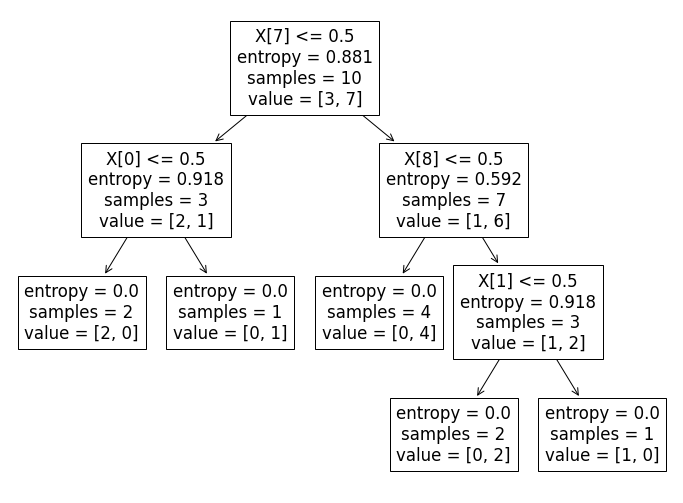

In [80]:
tree.plot_tree(clf_infoGain)
plt.show()

In [81]:
ypred=clf_infoGain.predict(X_train)
s1 = accuracy_score(y_train,ypred)
print('training accuracy',str(s1*100)+'%')

training accuracy 100.0%


In [82]:
ypred=clf_infoGain.predict(X_test)
s1 = accuracy_score(y_test,ypred)
print('testing accuracy',str(s1*100)+'%')

testing accuracy 75.0%


# **Q1 (b)**


In [83]:
Train

,RID,age,income,student,credit_rating,class_buys_computer
4,5,senior,low,yes,fair,1
5,6,senior,low,yes,excellent,0
6,7,middle_aged,low,yes,excellent,1
7,8,youth,medium,no,fair,0
8,9,youth,low,yes,fair,1
9,10,senior,medium,yes,fair,1
10,11,youth,medium,yes,excellent,1
11,12,middle_aged,medium,no,excellent,1
12,13,middle_aged,high,yes,fair,1
13,14,senior,medium,no,excellent,0


In [84]:
noise = pd.DataFrame([{'RID':15,'age': 'middle_aged','income':'low','student':'no','credit_rating':'fair','class_buys_computer': 0}])

In [25]:
noise

,RID,age,income,student,credit_rating,class_buys_computer
0,15,middle_aged,low,no,fair,0


In [85]:
Train_noise = pd.concat([Train,noise],axis=0)

In [86]:
X_train = enc.transform(Train_noise.drop(['class_buys_computer','RID'],axis=1))
y_train= Train_noise['class_buys_computer']
X_test = enc.transform(Test.drop(['class_buys_computer','RID'],axis=1))
y_test = Test['class_buys_computer']

In [87]:
clf_infoGain1 = sklearn.tree.DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_split=2)
clf_infoGain1.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

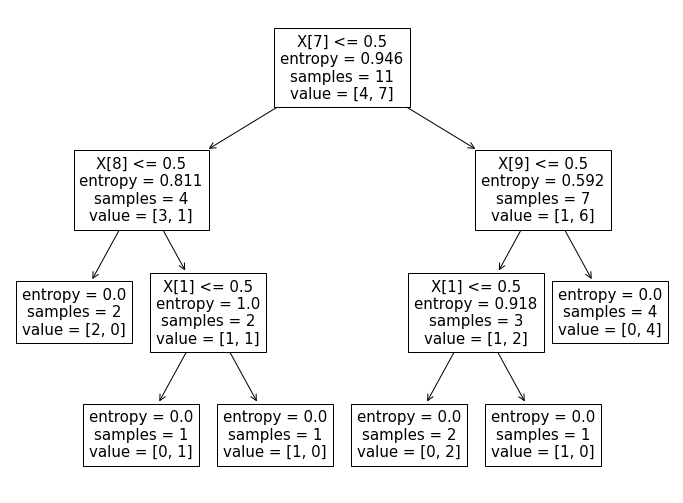

In [88]:
tree.plot_tree(clf_infoGain1)
plt.show()

In [71]:
ypred=clf_infoGain1.predict(X_train)
s2 = accuracy_score(y_train,ypred)
print('training accuracy',str(s2*100)+'%')

training accuracy 100.0%


In [73]:
ypred=clf_infoGain1.predict(X_test)
s3 = accuracy_score(y_test,ypred)
print('testing accuracy',str(s3*100)+'%')

testing accuracy 50.0%


# **Q1 (c)**

In [63]:
X_train = enc.transform(Train.drop(['class_buys_computer'],axis=1))
y_train= Train['class_buys_computer']
X_test = enc.transform(Test.drop(['class_buys_computer'],axis=1))
y_test = Test['class_buys_computer']

In [64]:
clf_Gini = sklearn.tree.DecisionTreeClassifier(random_state=1,criterion='gini',min_samples_split=2)
clf_Gini.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

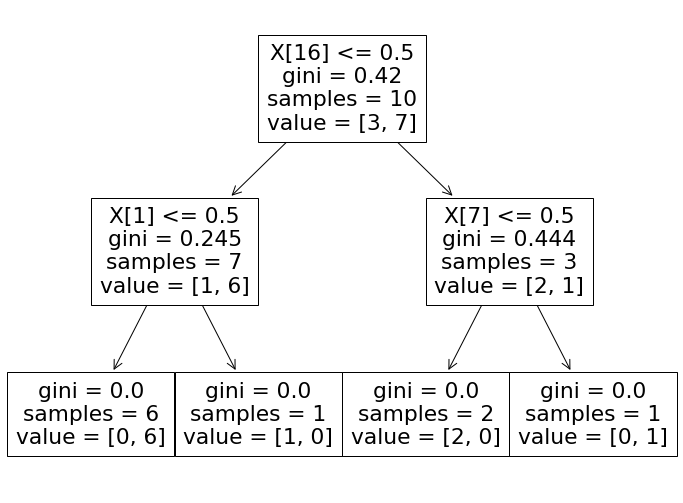

In [65]:
tree.plot_tree(clf_Gini)
plt.show()

In [66]:
ypred=clf_Gini.predict(X_train)
s2 = accuracy_score(y_train,ypred)
print('training accuracy',str(s2*100)+'%')

training accuracy 100.0%


In [67]:
ypred=clf_Gini.predict(X_test)
s3 = accuracy_score(y_test,ypred)
print('testing accuracy',str(s3*100)+'%')

testing accuracy 50.0%


# **Q2 a)**

In [94]:
enc1 = OrdinalEncoder()
enc1.fit(Train.drop(['RID','class_buys_computer'],axis=1))


X_train = enc1.transform(Train.drop(['RID','class_buys_computer'],axis=1))
y_train= Train['class_buys_computer']
X_test = enc1.transform(Test.drop(['RID','class_buys_computer'],axis=1))
y_test = Test['class_buys_computer']

In [96]:
clf_b = NB(alpha=0)
clf_b.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


CategoricalNB(alpha=0, class_prior=None, fit_prior=True)

In [97]:
ypred=clf_b.predict(X_train)
s4 = accuracy_score(y_train,ypred)
print('training accuracy',str(s4*100)+'%')

training accuracy 90.0%


In [98]:
ypred=clf_b.predict(X_test)
s5 = accuracy_score(y_test,ypred)
print('testing accuracy',str(s5*100)+'%')

testing accuracy 25.0%


# **Q2 b)**

In [89]:
Train_noise = pd.concat([Train,noise],axis=0)

In [90]:
X_train = enc1.transform(Train_noise.drop(['RID','class_buys_computer'],axis=1))
y_train= Train_noise['class_buys_computer']
X_test = enc1.transform(Test.drop(['RID','class_buys_computer'],axis=1))
y_test = Test['class_buys_computer']

In [91]:
clf_b_noise = NB(alpha=0)
clf_b_noise.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


CategoricalNB(alpha=0, class_prior=None, fit_prior=True)

In [92]:
ypred=clf_b_noise.predict(X_train)
s6 = accuracy_score(y_train,ypred)
print('training accuracy',str(s6*100)+'%')

training accuracy 81.81818181818183%


In [93]:
ypred=clf_b.predict(X_test)
s7 = accuracy_score(y_test,ypred)
print('testing accuracy',str(s7*100)+'%')

testing accuracy 25.0%
